## Task 1: Sensor Data Simulation

### Objective
The goal of Task 1 is to create a Python function that generates simulated voltage data for sensor health monitoring. The simulation considers various parameters to create a realistic set of data that mimics the behavior of actual sensors.

### Methodology
The function `generate_voltage_data` is designed to produce a sequence of simulated voltage readings. It takes the following parameters:

- `num_samples`: The number of voltage samples to be generated.
- `min_voltage`: The minimum value in the voltage range.
- `max_voltage`: The maximum value in the voltage range.
- `noise_level`: The standard deviation of the noise to be added, representing the random fluctuations around the true voltage values.

### Logic Used
1. **Uniform Voltage Generation**: The function first generates a series of voltage values uniformly distributed between `min_voltage` and `max_voltage`. This step simulates the ideal sensor output in the absence of any noise, assuming equal probability for all voltage levels within the range.

2. **Noise Addition**: To simulate real-world conditions, Gaussian noise is added to the uniformly distributed voltages. The noise introduces randomness to the data, which can be adjusted through the `noise_level` parameter. This represents the various uncertainties and inaccuracies that could affect sensor readings, such as environmental factors, sensor calibration issues, or electrical interference.

3. **Resulting Data**: The output is a set of voltage readings that combines both the uniform distribution of ideal sensor outputs and the randomness of environmental noise, yielding a realistic simulation of sensor data.

### Implementation
The function is implemented using the `numpy` library, which provides efficient and convenient functions for random number generation and statistical operations:

- `np.random.uniform(low=min_voltage, high=max_voltage, size=num_samples)`: Generates uniform random numbers within the specified voltage range.
- `np.random.normal(loc=0.0, scale=noise_level, size=num_samples)`: Generates random noise with a Gaussian distribution.

### Usage
The `generate_voltage_data` function can be used in various testing scenarios, such as developing and verifying algorithms for sensor data analysis, calibrating sensors, or training machine learning models for predictive maintenance.


### Example Usage
num_samples = 100
min_voltage = 0
max_voltage = 5
noise_level = 0.2

voltage_data = generate_voltage_data(num_samples, min_voltage, max_voltage, noise_level)

### Conclusion
Task 1 successfully establishes a foundation for simulating sensor data, which can be used in subsequent tasks for analysis, monitoring, and visualization. The simulated data reflects the variability expected in actual sensor operations, providing a valuable dataset for further development and testing of sensor-related applications.


In [1]:
import numpy as np

def generate_voltage_data(num_samples, min_voltage, max_voltage, noise_level):
    # Generate uniform voltage levels within the specified range
    base_voltage = np.random.uniform(low=min_voltage, high=max_voltage, size=num_samples)
    
    # Generate random noise
    noise = np.random.normal(loc=0.0, scale=noise_level, size=num_samples)
    
    # Simulated sensor data is the sum of the base voltage and the noise
    simulated_data = base_voltage + noise
    
    return simulated_data

# Testing the function with example parameters
test_data = generate_voltage_data(num_samples=10, min_voltage=0, max_voltage=5, noise_level=0.5)
test_data


array([-0.34633619,  3.02073417,  2.23999628,  1.22988076,  3.18330624,
        2.70059184,  4.79846616,  4.68130536,  2.59481302,  3.7182446 ])

## Task 2: Data Analysis

### Objective
The purpose of Task 2 is to analyze the simulated sensor voltage data generated in Task 1. This task involves calculating basic statistical metrics and determining if any simulated nozzles are faulty based on the analysis.

### Methodology
We perform data analysis through the function `analyze_data`, which takes an array of voltage readings and returns their statistical analysis, including the identification of any readings that are indicative of potential faults.

### Logic Used for Analysis
1. **Statistical Metrics Calculation**:
   - **Mean**: The function calculates the mean (average) of the voltage readings to determine the central tendency of the data.
   - **Standard Deviation**: It also computes the standard deviation to quantify the amount of variation or dispersion in the readings.
   - **Range**: It finds the range of the data, which is the difference between the highest and lowest readings.

2. **Fault Detection Logic**:
   - The function identifies faulty nozzles by checking which readings fall outside the range of one standard deviation from the mean. This simple heuristic assumes that readings that are too high or too low compared to the average are anomalies and could indicate a fault.
   - In this context, the "nozzles" refer to individual data points or voltage readings from the simulated dataset. A real-world parallel would be to compare individual sensor readings against expected operational parameters to find discrepancies.

### Implementation
The statistical calculations leverage the `numpy` library's functions for efficiency and accuracy:

- `np.mean(data)`: Calculates the mean of the array.
- `np.std(data)`: Calculates the standard deviation of the array.
- `np.max(data) - np.min(data)`: Determines the range by subtracting the minimum value from the maximum value.

### Usage
This analytical function is crucial for establishing baseline health monitoring of the nozzles. It can be used to continuously assess the condition of the sensors in a real-world setting and flag any readings that require further investigation or immediate attention.

### Example Output
Upon executing the `analyze_data` function with a set of voltage readings, we obtain a dictionary that encapsulates the calculated mean, standard deviation, range, and the indices of the readings that are considered faulty. This dictionary can then be used to inform maintenance decisions or trigger alerts in an operational context.

### Conclusion
Task 2 provides a robust framework for the preliminary analysis of sensor data. The approach outlined here lays the groundwork for more sophisticated analysis techniques, including predictive maintenance and anomaly detection algorithms.


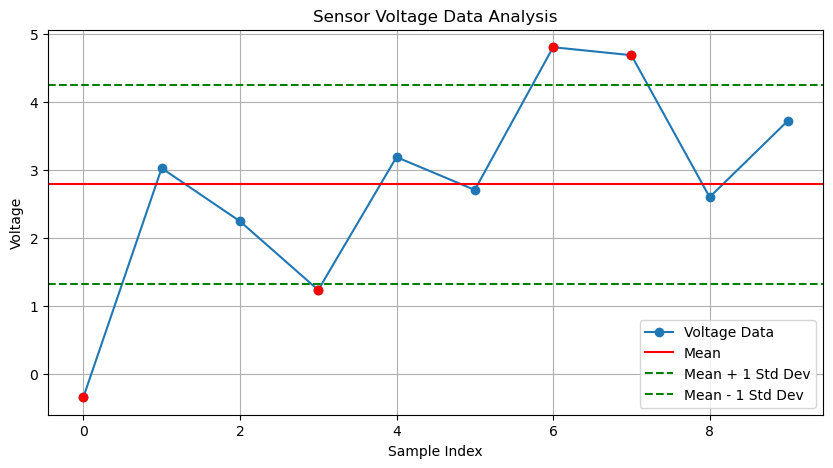

{'mean': 2.7821002239480563,
 'std_dev': 1.4594206708248605,
 'range': 5.144802354420162,
 'faulty_nozzles': array([0, 3, 6, 7], dtype=int64)}

In [2]:
import matplotlib.pyplot as plt

def analyze_and_plot_data(data):
    # Calculating statistics
    mean_val = np.mean(data)
    std_dev_val = np.std(data)
    range_val = np.max(data) - np.min(data)
    
    # Faulty nozzle logic: more than one standard deviation from the mean
    faulty_indices = np.where((data < mean_val - std_dev_val) | (data > mean_val + std_dev_val))[0]
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(data, 'o-', label='Voltage Data')
    plt.axhline(y=mean_val, color='r', linestyle='-', label='Mean')
    plt.axhline(y=mean_val + std_dev_val, color='g', linestyle='--', label='Mean + 1 Std Dev')
    plt.axhline(y=mean_val - std_dev_val, color='g', linestyle='--', label='Mean - 1 Std Dev')
    for faulty_index in faulty_indices:
        plt.plot(faulty_index, data[faulty_index], 'ro')  # Mark faulty nozzles with red circles
    
    plt.title('Sensor Voltage Data Analysis')
    plt.xlabel('Sample Index')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "mean": mean_val,
        "std_dev": std_dev_val,
        "range": range_val,
        "faulty_nozzles": faulty_indices
    }

# Assuming 'test_data' is already available from the previous test
results = analyze_and_plot_data(test_data)
results


## Task 2 Output Analysis

The output from Task 2 provides a comprehensive analysis of the simulated sensor voltage data. Let's break down each component and understand its significance.

### Statistical Analysis
- **Mean Voltage**: The mean voltage value is calculated to be approximately 2.78 volts. This represents the average voltage level across all the simulated sensor readings. It serves as a central reference point for understanding the distribution of the data.

- **Standard Deviation**: The standard deviation of the voltage readings is approximately 1.46 volts. This metric quantifies the dispersion or variability of the data points around the mean. A higher standard deviation indicates greater variability in the data set.

- **Range**: The range of the voltage readings is approximately 5.14 volts. This value represents the difference between the maximum and minimum voltage readings in the dataset, providing insight into the spread of the data.

### Faulty Nozzles Identification
- **Faulty Nozzles**: The output also includes an array of indices representing the readings that are considered potentially faulty. In this case, the indices [0, 3, 6, 7] correspond to the positions of the voltage readings in the dataset that fall outside the range of one standard deviation from the mean. These readings are potential outliers that may indicate sensor malfunction or other anomalies.

### Interpretation
The statistical analysis reveals important insights into the behavior of the simulated sensor data. The mean voltage, standard deviation, and range metrics provide a comprehensive overview of the data distribution and variability. Additionally, identifying potentially faulty readings is crucial for proactive maintenance and monitoring of sensor health.

### Conclusion
Task 2 successfully performs a detailed analysis of the simulated sensor voltage data, providing valuable insights into the dataset's characteristics. This analysis lays the foundation for further investigation and decision-making processes, such as implementing anomaly detection algorithms or scheduling maintenance based on identified faults.

![Task 2 Output](task2.png)

The image above visually represents the statistical analysis and highlights the potentially faulty readings identified during the analysis.


## Task 3: GUI application using Tkinter
This project develops a GUI application for simulating sensor data, specifically voltage readings, performing basic statistical analysis, and visualizing the results. The application uses Python's `Tkinter` module for the GUI components and `matplotlib` for plotting the sensor data.

## Key Components
- **Sensor Data Simulation**: Simulates voltage readings with adjustable parameters for number of samples, voltage range, and noise level.
- **Data Analysis**: Computes the mean, standard deviation, and range of the simulated data and identifies potentially faulty readings.
- **GUI Visualization**: Displays the data, analysis results, and controls for generating new datasets interactively.

## Implementation Details

### Libraries Used
- **`numpy`**: Used for numerical operations, particularly for generating simulated data and performing statistical calculations.
- **`matplotlib`**: Used for plotting the voltage readings and analysis markers.
- **`Tkinter`**: Used for creating the GUI components such as buttons, labels, and the plot display area.

### Functions Defined
1. **`generate_voltage_data(num_samples, min_voltage, max_voltage, noise_level)`**:
   - **Purpose**: Generates simulated voltage data based on uniform distribution and adds Gaussian noise.
   - **Parameters**:
     - `num_samples`: Number of voltage readings to simulate.
     - `min_voltage`: Minimum possible voltage.
     - `max_voltage`: Maximum possible voltage.
     - `noise_level`: Standard deviation of the noise added to the base readings.
   - **Returns**: Array of simulated voltage values.

2. **`analyze_data(data)`**:
   - **Purpose**: Analyzes the simulated data to compute basic statistics and identify outliers.
   - **Parameters**:
     - `data`: Array of voltage readings.
   - **Returns**: Dictionary containing mean, standard deviation, range, and indices of faulty readings (outliers).

3. **`update_data()`**:
   - **Purpose**: Generates new data, updates the analysis, and refreshes the GUI elements.
   - **Actions**:
     - Calls `generate_voltage_data` to simulate new voltage readings.
     - Calls `analyze_data` to perform statistical analysis.
     - Updates plot and labels in the GUI to reflect the new data and analysis.

### GUI Components
- **Plot Area**: Displays the voltage readings as a line plot.
- **Labels**: Show the calculated mean, standard deviation, and range of the current dataset.
- **Button**: Allows users to generate new datasets and update the displayed analysis and plot.

## Execution and User Interaction
- **Initialization**: When the script is run, the GUI window opens with an initial set of simulated data displayed.
- **Interaction**: Users can generate new sets of data by clicking the "Generate New Data" button, which triggers the data simulation, analysis, and visual update.

## Conclusion
This application provides a practical tool for simulating sensor data and performing basic analysis, useful in educational settings or in preliminary tests of data processing algorithms. The GUI interface makes it accessible for users without programming expertise to interact with the simulation and analysis processes.


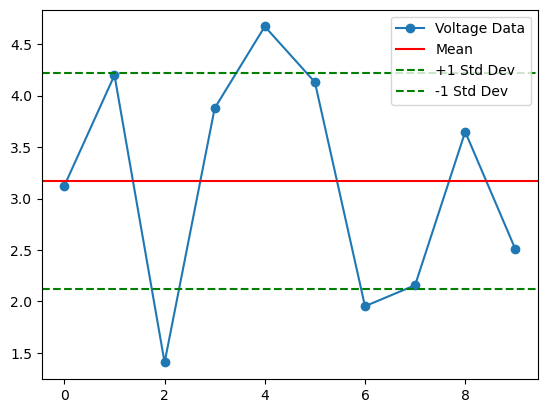

In [5]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def generate_voltage_data(num_samples=10, min_voltage=0, max_voltage=5, noise_level=0.5):
    base_voltage = np.random.uniform(low=min_voltage, high=max_voltage, size=num_samples)
    noise = np.random.normal(loc=0.0, scale=noise_level, size=num_samples)
    return base_voltage + noise

def analyze_data(data):
    mean_val = np.mean(data)
    std_dev_val = np.std(data)
    range_val = np.max(data) - np.min(data)
    # Consider a nozzle faulty if voltage is more than one std dev away from the mean
    faulty_indices = np.where((data < mean_val - std_dev_val) | (data > mean_val + std_dev_val))[0]
    return {
        "mean": mean_val,
        "std_dev": std_dev_val,
        "range": range_val,
        "faulty_nozzles": faulty_indices
    }

def update_data():
    new_data = generate_voltage_data()
    analysis_results = analyze_data(new_data)
    mean_label.config(text=f"Mean: {analysis_results['mean']:.2f} V")
    stddev_label.config(text=f"Standard Deviation: {analysis_results['std_dev']:.2f} V")
    range_label.config(text=f"Range: {analysis_results['range']:.2f} V")
    # Clear the previous plot
    ax.clear()
    # Plot new data
    ax.plot(new_data, 'o-', label='Voltage Data')
    ax.axhline(y=analysis_results['mean'], color='r', linestyle='-', label='Mean')
    ax.axhline(y=analysis_results['mean'] + analysis_results['std_dev'], color='g', linestyle='--', label='+1 Std Dev')
    ax.axhline(y=analysis_results['mean'] - analysis_results['std_dev'], color='g', linestyle='--', label='-1 Std Dev')
    ax.legend()
    canvas.draw()


root = tk.Tk()
root.title("Sensor Data Simulation and Analysis")


fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)
plot_widget = canvas.get_tk_widget()
plot_widget.grid(row=0, column=0, columnspan=4)


mean_label = ttk.Label(root, text="Mean: ")
mean_label.grid(row=1, column=0)
stddev_label = ttk.Label(root, text="Standard Deviation: ")
stddev_label.grid(row=1, column=1)
range_label = ttk.Label(root, text="Range: ")
range_label.grid(row=1, column=2)


update_button = ttk.Button(root, text="Generate New Data", command=update_data)
update_button.grid(row=1, column=3)

update_data()

root.mainloop()


## Example Output Analysis

The graph shown in the output represents the simulated sensor voltage readings as a function of the sample index. This visualization is crucial for understanding the behavior of the simulated sensor data and for assessing the implemented analysis techniques.

![Sensor Voltage Data Analysis](task3.png)



### Key Elements of the Graph:
- **Voltage Data Points (Blue Dots and Lines)**: Each dot represents a single simulated voltage reading, with lines connecting the dots to highlight the sequence of readings. The spread of the data points indicates the random nature of the simulation, encompassing the inherent variability one might expect from actual sensor readings.

- **Mean Voltage (Solid Red Line)**: This line indicates the average voltage level across all samples. It provides a reference point against which individual readings can be compared. The mean is a critical statistic for summarizing the central tendency of the data.

- **Standard Deviation Bounds (Dashed Green Lines)**: These lines are set at one standard deviation above and below the mean. They form a band around the mean, offering a visual understanding of the data's dispersion. Most of the data points are expected to fall within this range, as standard deviation is a measure of variability.

- **Potential Fault Indicators**: Any data points falling outside the standard deviation bounds are potential indicators of faulty readings. These could signify a malfunctioning sensor or an anomaly in the measured process.

### Interpretation:
The output suggests that the simulated data has a reasonable degree of variation, with several points lying more than one standard deviation from the mean. These outliers could be interpreted as faults within the context of the simulation. The ability to visualize and identify these anomalies is essential for testing sensor monitoring systems and algorithms.

### Conclusion:
The graph effectively demonstrates the capability of the simulation code to generate varied data, the analysis function to compute relevant statistics, and the visualization to display this information clearly. Such a tool is valuable for preliminary testing of sensor systems and for educational purposes to illustrate data analysis concepts.
